Import cobain and other useful packages.

In [1]:
import cobain
import matplotlib.pyplot as plt
import numpy as np
import os

A contact binary is created by providing the following parameters:

In [2]:
mass1 = 1.0 # mass of the primary star
q = 0.5 # mass ratio of the system
FF = 0.1 # fillout factor
pot_range = 0.01 # range of potentials to build the mesh in
dims = [10,10,10] # dimensions of each component in the mesh [potentials, thetas, phis]
n1 = 3.0 # polytropic index of the primary
n2 = 3.0 # polytropic index of the secondary
lebedev_ndir = 5 # order of Lebedev quadratures
directory = os.getcwd()+'contact_basic/'

If none of the parameters are provided, the code will create the default system with mass1=1, q=1, FF=0.1, pot_range=0.01, dims=[50,50,50], n1=3.0, n2=3.0, and lebedev_ndir=5.
The pickled file of the class instance with the chosen parameters is stored upon creation, to avoid having to build the mesh repeatedly, as well as the initial structural quantity files. If no directory path is explicitly provided, everything will be stored in the current working directory.

To create a contact binary object and its associated structural files, we call:

In [3]:
cb = cobain.bodies.binary.Contact_Binary(mass1 = mass1, q = q, ff = FF, pot_range = pot_range,
                                  dims = dims, n1 = n1, n2 = n2,
                                  lebedev_ndir = lebedev_ndir,
                                  dir = directory)

2018-04-20 13:16:58,668: Building primary equipotential surface at pot=2.84598619576002


2018-04-20 13:16:59,432: Building primary equipotential surface at pot=2.8470973068711314


2018-04-20 13:16:59,932: Building primary equipotential surface at pot=2.8482084179822422


2018-04-20 13:17:00,698: Building primary equipotential surface at pot=2.8493195290933535


2018-04-20 13:17:01,450: Building primary equipotential surface at pot=2.8504306402044643


2018-04-20 13:17:02,218: Building primary equipotential surface at pot=2.8515417513155756


2018-04-20 13:17:03,007: Building primary equipotential surface at pot=2.8526528624266865


2018-04-20 13:17:03,801: Building primary equipotential surface at pot=2.8537639735377978


2018-04-20 13:17:04,586: Building primary equipotential surface at pot=2.8548750846489086


2018-04-20 13:17:05,389: Building primary equipotential surface at pot=2.85598619576002


2018-04-20 13:17:06,213: Building secondary equipotential surface at pot=2.84598619576002


2018-04-20 13:17:06,713: Building secondary equipotential surface at pot=2.8470973068711314


2018-04-20 13:17:07,432: Building secondary equipotential surface at pot=2.8482084179822422


2018-04-20 13:17:08,171: Building secondary equipotential surface at pot=2.8493195290933535


2018-04-20 13:17:08,855: Building secondary equipotential surface at pot=2.8504306402044643


2018-04-20 13:17:09,520: Building secondary equipotential surface at pot=2.8515417513155756


2018-04-20 13:17:10,079: Building secondary equipotential surface at pot=2.8526528624266865


2018-04-20 13:17:10,733: Building secondary equipotential surface at pot=2.8537639735377978


2018-04-20 13:17:11,230: Building secondary equipotential surface at pot=2.8548750846489086


2018-04-20 13:17:11,889: Building secondary equipotential surface at pot=2.85598619576002


2018-04-20 13:17:12,688: Computing intensities for point 1 of 5


2018-04-20 13:17:16,241: Computing intensities for point 2 of 5


2018-04-20 13:17:20,106: Computing intensities for point 3 of 5


2018-04-20 13:17:23,587: Computing intensities for point 4 of 5


2018-04-20 13:17:27,508: Computing intensities for point 5 of 5


The object is by default pickled into the given directory with a filename 'body', thus loading an already created contact binary object is fairly simple: 

In [4]:
cb = cobain.bodies.binary.Contact_Binary.unpickle(directory+'body')

The contact binary object stores the given parameters, all computed parameters and the mesh. The contents of the mesh are stored in cb.mesh:

In [5]:
cb.mesh

{'normals': array([[ 1.84251060e-02, -0.00000000e+00,  9.99830243e-01],
        [ 1.84251060e-02, -0.00000000e+00,  9.99830243e-01],
        [ 1.84251060e-02, -0.00000000e+00,  9.99830243e-01],
        ...,
        [ 7.03769974e-01,  7.10427916e-01,  7.62014884e-17],
        [ 9.16997138e-01,  3.98893782e-01,  8.13215282e-17],
        [ 1.00000000e+00,  1.46261864e-16,  8.36789084e-17]]),
 'phis': array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265]),
 'pots': array([2.8459862 , 2.84709731, 2.84820842, 2.84931953, 2.85043064,
        2.85154175, 2.85265286, 2.85376397, 2.85487508, 2.8559862 ]),
 'rhos': array([1.49740983e-09, 1.49740983e-09, 1.49740983e-09, ...,
        3.17097099e-07, 3.17097099e-07, 3.17097099e-07]),
 'rs': array([[0.00000000e+00, 0.00000000e+00, 8.38363721e-01],
        [0.00000000e+00, 0.00000000e+00, 8.38363721e-01],
        [0.00000000e+00, 0.00000000e+00, 8.38363721e-01],
        .

The mesh stores the nested equipotential coordinates of the mesh ('potentials', 'thetas', 'phis') as well as the cartesian coordinates of the points ('rs'), their normals ('normals') and densitites ('rhos'). We can visualize the mesh with:

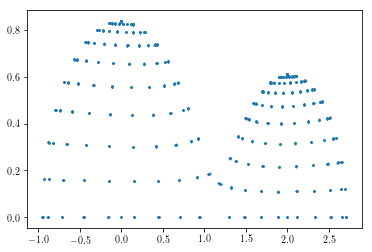

In [6]:
plt.scatter(cb.mesh['rs'][:,0], cb.mesh['rs'][:,2], s=1)
plt.show()

The plotting submodule offers some useful functions for plotting the radiative properties. You can choose to plot the intensity in a given direction:

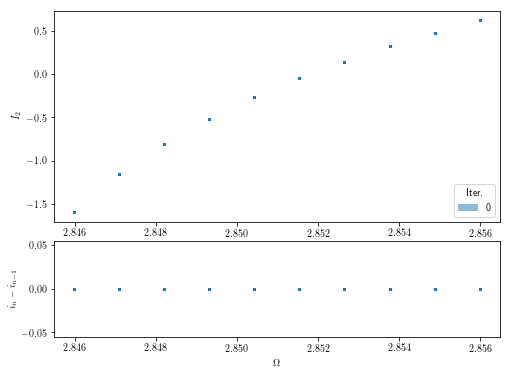

In [7]:
cobain.bodies.plotting.plot_intensity_dir(cb, simdir = cb.directory, iter_n = 0, 
                                          direction_no = 2, comp = 1, 
                                          pot_range = cb.pot_range, skip = 1)
# simdir - directory where we keep the rt simulations, can be anything
# iter_n - which iteration is being plotted (each one before will also be plotted)
# direction_no - the index of the Lebedev direction we're plotting
# comp = 1, 2 - primary or secondary component
# pot_range - range of potentials to show up on the plot, can be anything
# skip - in case of large meshes, the output plot is very large, so some of the points
#        can be omitted with [::skip]

The default display mode for the plot is plt.show() but it can also be saved with setting savefig=True. The output is by default saved in a directory named 'pics/' within simdir.

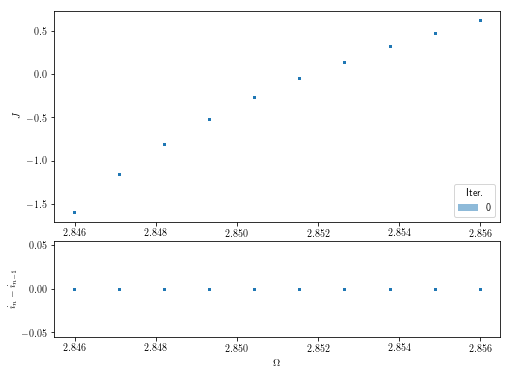

In [8]:
cobain.bodies.plotting.plot_mean_intensity(cb, simdir = cb.directory, iter_n = 0, comp = 1, 
                                  pot_range = cb.pot_range, skip = 1)

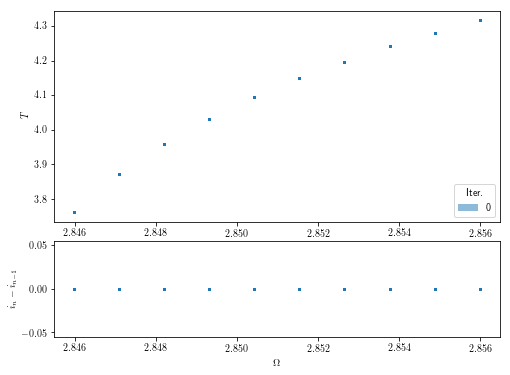

In [9]:
cobain.bodies.plotting.plot_temperature(cb, simdir = cb.directory, iter_n = 0, comp = 1, 
                                  pot_range = cb.pot_range, skip = 1)

We compute the intensities at a set of given points in cb.mesh['rs'] with cb.sweep_mesh():

In [11]:
points = np.linspace(0,len(cb.mesh['rs'])-1,10).astype(int)
Is_p, thetas_p, phis_p = cb.sweep_mesh(points=points)

2018-04-20 13:19:16,106: Computing intensities for point 1 of 10


2018-04-20 13:19:19,852: Computing intensities for point 2 of 10


2018-04-20 13:19:23,655: Computing intensities for point 3 of 10


2018-04-20 13:19:27,831: Computing intensities for point 4 of 10


2018-04-20 13:19:31,635: Computing intensities for point 5 of 10


2018-04-20 13:19:35,495: Computing intensities for point 6 of 10


2018-04-20 13:19:39,197: Computing intensities for point 7 of 10


2018-04-20 13:19:42,921: Computing intensities for point 8 of 10


2018-04-20 13:19:46,656: Computing intensities for point 9 of 10


2018-04-20 13:19:50,382: Computing intensities for point 10 of 10


thetas_p and phis_p are the spherical angles of the directions rotated with respect to the surface normals of the plots. Once the intensities in all directions are computed, the mean intensity, temperature and opacity can be recomputed with:

In [12]:
Js_p, Ts_p, chis_p = cb.conserve_energy(Is_p,points=points)